In [1]:
import pandas as pd
lego = pd.read_csv('legosets.csv')
print(lego.columns)

Index(['item_number', 'name', 'year', 'theme', 'subtheme', 'pieces',
       'minifigures', 'image_URL', 'price'],
      dtype='object')


In [6]:
# Group the data by 'theme_id' and count the number of occurrences
theme_counts = lego['theme'].value_counts()

In [9]:
# Create a summary table
summary_table = pd.DataFrame({'Themes': theme_counts.index, 'Count': theme_counts.values})

In [10]:
# Display the summary table
print(summary_table)

                        Themes  Count
0                        Duplo    471
1                    Star Wars    379
2                         Town    314
3      Collectable Minifigures    311
4                         City    282
..                         ...    ...
110               Serious Play      4
111                  Spybotics      4
112                  Hobby Set      4
113               The Simpsons      2
114  Avatar The Last Airbender      2

[115 rows x 2 columns]


newlego = lego.assign(decade=lego.year-lego.year%10).astype({'decade': 'string'})


The given Python code is used to add a new column called 'decade' to a Pandas DataFrame object named 'lego' and populate it with the decade information derived from the 'year' column in the 'lego' DataFrame. Here's a breakdown of how the code works:

lego.year: This selects the 'year' column from the 'lego' DataFrame, which presumably contains information about the year of each Lego set.

lego.year % 10: This calculates the remainder when each year value in the 'year' column is divided by 10. This is done to determine the decade information for each year value. For example, if the 'year' value is 1985, then 1985 % 10 would be 5, indicating that it belongs to the 1980s decade.

lego.year - lego.year % 10: This subtracts the remainder calculated in the previous step from the 'year' value, effectively rounding down the year value to the nearest decade. For example, if the 'year' value is 1985, then 1985 - 1985 % 10 would be 1980, representing the start of the 1980s decade.

lego.assign(decade=lego.year-lego.year%10): This creates a new column called 'decade' in the 'lego' DataFrame and populates it with the decade information calculated in the previous step using the assign() method. The 'decade' column will contain the rounded down year values, representing the start of each decade.

astype({'decade': 'string'}): This converts the data type of the 'decade' column to string using the astype() method, ensuring that the decade values are treated as strings instead of numeric values. This may be done to represent the decade information as categorical or text data rather than numerical data, depending on the specific use case.







In [11]:
newlego = lego.assign(decade=lego.year-lego.year%10).astype({'decade': 'string'})

In [12]:
newlego.head()

,item_number,name,year,theme,subtheme,pieces,minifigures,image_URL,price,decade
0,10246,Detective's Office,2015,Advanced Models,Modular Buildings,2262.0,6.0,http://images.brickset.com/sets/images/10246-1...,132.99,2010
1,10247,Ferris Wheel,2015,Advanced Models,Fairground,2464.0,10.0,http://images.brickset.com/sets/images/10247-1...,149.99,2010
2,10248,Ferrari F40,2015,Advanced Models,Vehicles,1158.0,NaN,http://images.brickset.com/sets/images/10248-1...,69.99,2010
3,10249,Toy Shop,2015,Advanced Models,Winter Village,898.0,NaN,http://images.brickset.com/sets/images/10249-1...,59.99,2010
4,10581,Ducks,2015,Duplo,Forest Animals,13.0,1.0,http://images.brickset.com/sets/images/10581-1...,9.99,2010


I will use the popular Python plotting library Matplotlib to reproduce the graphical plot as accurately as possible. Here's the Python code to generate the plot:

In [13]:
import matplotlib.pyplot as plt

In [14]:
# Group by 'decade' and count the number of Lego sets in each decade
lego_counts = newlego.groupby('decade').size()

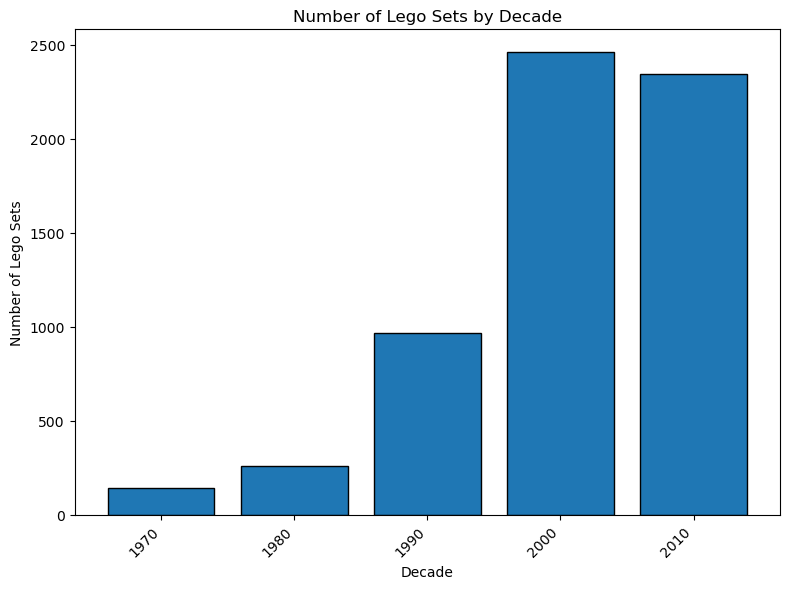

In [15]:
# Create a bar plot of the Lego set counts by decade
plt.figure(figsize=(8, 6))
lego_counts.plot(kind='bar', width=0.8, edgecolor='black', linewidth=1)
plt.title('Number of Lego Sets by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Lego Sets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Using the dataset output from part (b), apply a Python plotting library (of your choice) to reproduce the graphical plot below as accurately as possible.  Focus on the content of the plot rather than the exact look.  Do not worry about any colours used.  Include both Python code and the plot that your code produces in your answer.

In [16]:
import seaborn as sns

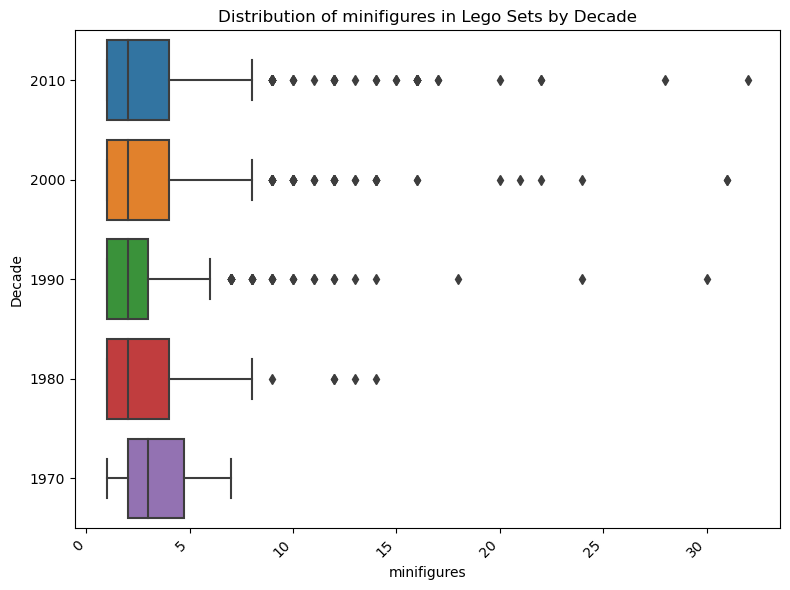

In [20]:
# Create a boxplot of the number of Lego sets by decade
plt.figure(figsize=(8, 6))
sns.boxplot(x='minifigures', y='decade', data=newlego)
plt.title('Distribution of minifigures in Lego Sets by Decade')
plt.xlabel('minifigures')
plt.ylabel('Decade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# Filter for Lego sets with "Pirates" theme
pirates_lego = newlego[newlego['theme'] == 'Pirates']

In [22]:
# Group by subtheme and calculate the mean number of Lego pieces per set
pirates_lego_summary = pirates_lego.groupby('subtheme').mean(numeric_only=True)

In [30]:
# Sort the summary table by mean number of Lego pieces per set in descending order
pirates_lego_summary = pirates_lego_summary.sort_values(by=['pieces'], ascending=False)

# Display the summary table
print(pirates_lego_summary[['pieces']])

                     pieces
subtheme                   
Islanders        196.285714
Imperial Guards  196.125000
Seasonal         148.000000
Imperial Armada  127.666667
Accessories       34.500000
